**수업을 수강하시기 전, lec2_1.ipynb의 "수강 전 필독"을 반드시 확인해주세요**

In [ ]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# About returns(수익률)

In [ ]:
df = pd.DataFrame(
    {
        "price":[1, 1.02, 1.01, 1.05],
    },
    index=[1,2,3,4]
)
df

## Simple daily return (일별 수익률)


- $r_n = {{p_{n}} \over {p_{n-1}}} - 1$

- Example1: Daily return
    - $r_s$: 1.02/1 - 1 = 0.02
        - Percentage(%) = 0.02 * 100 = 2%
    - `returns` = [0, 0.02, -0.0098, 0.0396]

- Example2: Cumulative return
    1. Using `returns`
        1*(1 + 0.02)(1 - 0.0098)(1 + 0.0396)/1 - 1 = 0.05
    2. Using first/last price value
        - 1.05/1 - 1 = 0.05

- Example3: Average daily return
    - $1*(1+x)^3$ = 1*(1 + 0.02)(1 - 0.0098)(1 + 0.0396)/1 = 1.05/1 = ${p_4}\over{p_1}$
        - $1 + x = {{{p_4}\over{p_1}}^{1/3}}$
    - ${p_n \over p_1}^{1\over(n-1)}$
    - 참고
        - [ X ] ${0.02 - 0.0098 + 0.0396} \over 3$ (산술평균)
            - 이 값은 실제 위의 식을 풀어서 구한 x값과는 다른 값이 나오게 됨
        - 복리(Compound)
            - (0.02의 수익을 얻은 후의 값)에 대해서 (-0.0098)의 손실을 본것이지, (원금)에 대해서 0.02, -0.0098 등의 손익, 손실을 본 것이 아님!
    
    

## Log daily return (일별 로그 수익률)

- $r_n = log{{p_{n}} \over {p_{n-1}}}$
    - natural log

- Example1: Daily return
    - $r_2$: $log({{1.02} \over {1}})$ = 0.0198
    - `returns` = [0, 0.01980263, -0.0098523,  0.03883983]
        - simple daily return 값이랑 거의 유사

- Example2: Cumulative return
    - Using `returns`
        - `sum(returns)` = $log{{p_2} \over {p_1}} + log{{p_3} \over {p_2}} + log{{p_4} \over {p_3}} = log{{p_4} \over {p_1}}$
        - cum return = $e^{log{{p_4} \over {p_1}}} - 1$
            - np.exp(0.01980263 -0.0098523 + 0.03883983) - 1 = 0.05
    - Using only last price value
        - 1.05/1 - 1 = 0.05

- Example3: Average daily return
    - 이 경우, Average **log** daily return을 구하게됨
    - 곱이 아니라, 그냥 산술평균으로 가능!
        - why?
            - ${{1}\over{3}}(log{{p_2} \over {p_1}} + log{{p_3} \over {p_2}} + log{{p_4} \over {p_3}})$
            - = ${{1}\over{3}}log{{p_4} \over {p_1}}$ = $log({{p_4} \over {p_1}})^{{1}\over{3}}$
            - 후에 exponential만 취해주면, Simple Daily return에서 Avg return 구할 때의 형태가 나옴!
    
   

## Simple return <--> log return 

$$
\begin{aligned}
r_l = log(r_s + 1) \\
r_s = e^{r_l} - 1
\end{aligned}
$$

# 일별 수익률(Daily Return) - Code

In [ ]:
import FinanceDataReader as fdr

df1 = fdr.DataReader("005930", '2018-01-02', '2018-10-30')
df2 = fdr.DataReader("069500", '2018-01-02', '2018-10-30')
df = pd.concat([df1['Close'], df2['Close']], axis=1)
df.columns = ['삼성전자', 'KODEX 200']
df.head()

## `shift()`

In [ ]:
df.shift()

In [ ]:
df.shift(periods=1).head()

In [ ]:
df.shift(1, freq="S").head()

In [ ]:
df.head()
df.shift().head()

In [ ]:
(df / df.shift() - 1)

## `pct_change()`

In [ ]:
df.pct_change(periods=1).head()

In [ ]:
df.pct_change(periods=2).head()

## Simple return

In [ ]:
simple_rtn_df = df.pct_change().fillna(0)
simple_rtn_df.head()

## Log return

In [ ]:
np.log(df / df.shift())

In [ ]:
# = np.log(df.pct_change() + 1)
log_rtn_df = np.log(df / df.shift()).fillna(0)
log_rtn_df.head()

## Return visualization 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib
import matplotlib.font_manager as fm

matplotlib.rcParams['axes.unicode_minus'] = False

# font_location = "C:/Windows/Fonts/NanumGothic.ttf"
font_location = "/Library/Fonts/NanumBarunGothic.ttf" 
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [ ]:
log_rtn_df.plot()

In [ ]:
log_rtn_df.hist(bins=50, sharex=True)

In [ ]:
log_rtn_df.boxplot()

In [ ]:
sns.distplot(log_rtn_df['KODEX 200'], kde=False, bins=50);
sns.distplot(log_rtn_df['삼성전자'], kde=False, bins=50);

In [ ]:
sns.pairplot(log_rtn_df);

# 누적 수익률(Cumulative return) - Code


In [ ]:
df.head()

In [ ]:
df.iloc[0]

## From price data

In [ ]:
cum_rtn_df = df / df.iloc[0]
cum_rtn_df.head()

In [ ]:
cum_rtn_df * 5000000

## From simple return data

- time series + stationary

1

1 $\times (r_1 + 1)$

1 $\times (r_1 + 1) \times (r_2 + 1)$

1 $\times (r_1 + 1) \times (r_2 + 1) \times (r_3 + 1)$

1 $\times (r_1 + 1) \times (r_2 + 1) \times (r_3 + 1) ... \times (r_n + 1)$

In [ ]:
simple_rtn_df.head()

In [ ]:
cum_rtn_df = (1 + simple_rtn_df).cumprod()
cum_rtn_df.head() 

## From log return data

$ log{p_2 \over p_1} $

$ log{p_2 \over p_1} + log{p_3 \over p_2} (= log{p_3 \over p_1})$

$ log{p_2 \over p_1} + log{p_3 \over p_2} +  ... + log{p_n \over p_{n-1}} (= log{p_n \over p_1})$

In [ ]:
log_rtn_df.head()

In [ ]:
cum_rtn_df = np.exp(log_rtn_df.cumsum())
cum_rtn_df.head()

## Cum return visualization

In [ ]:
cum_rtn_df.plot()

# [Advanced] log return vs simple return

- Reference
    - https://tradingqna.com/t/why-stock-returns-are-calculated-in-log-scale/806/2
    - https://quantivity.wordpress.com/2011/02/21/why-log-returns/

1. Simple return has a positive bias   
    - 복리계산(기하평균 계산)으로 인한 +, - 수익률 관계의 불균형을 없애줌
        - "복리계산(기하평균 계산)으로 인한 +, - 수익률 관계의 불균형"이란?
            - 예를 들어, 첫째날 50% 손실을 보고 다음날 50% 수익을 봐도 원금 복구가 되지 않음 
                - 1 * (1 - 0.5) * (1 + 0.5) = 0.75 (원금의 75%)
            - 즉, 숫자상으로는 -50%, +50% 이기 때문에 단순 산술연산을 하면 본전일 것 같지만(-50 + 50 = 0), 복리계산이기 때문에 결과적으로 0이 되지 않는 불균형이 발생하게 됨 
    - 첫날 10퍼센트 수익, 둘째날 2퍼센트 손실을 본 경우,
        - Simple return
            - $p_2 \over p_1$ -1 = 0.10

            - $p_3 \over p_2$ -1 = -0.02
            - 1 * (1 + 0.10) * (1 - 0.02) = 1.078 vs 1 + (+0.10) + (-0.02) = 1.08
                - (0.10 * -0.02)term 이 추가적으로 더해지기 때문에 bias가 발생
            - Simple return을 단순히 더해버리면, 실제 나와야하는 값(기하적으로 구한 값, 1.078)보다 '+' bias가 있음을 알 수 있다
        - log return 
            - $log{{p_2}\over{p_1}}$ = log(1.1) =  0.0953
            - $log{{p_3}\over{p_2}}$ = log(0.98) =  -0.0202
            - 이 둘을 더하면 --> 0.0751
                - 더한 결과를 식으로 표현하면 $log{{p_3}\over{p_1}}$이므로, exp()를 씌워서, ${p_3}\over{p_1}$을 구하면, 1.078이 나온다
               

2. Additivity
    - Multi-period log return = sum(log returns_1 + log returns_2 + ..)
    

3. Numerically safe
    - 작은 소수점의 '곱'은 "arithmetic underflow"
        - The term arithmetic underflow (also floating point underflow, or just underflow) is a condition in a computer program where the result of a calculation is a number of smaller absolute value than the computer can actually represent in memory on its central processing unit (CPU) (https://en.wikipedia.org/wiki/Arithmetic_underflow)
    - log() & '+' 연산은 underflow problem을 야기시키지 않음

In [ ]:
np.prod(1/np.array(range(1, 2000)))

In [ ]:
np.sum(np.log(1/np.array(range(1, 2000))))

4. approximate equality

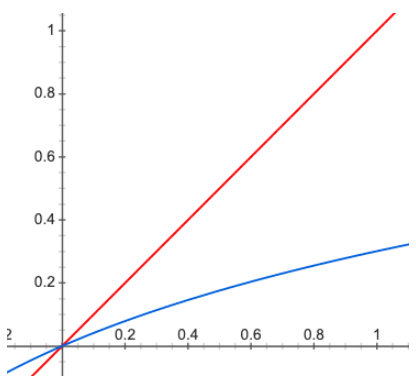
    
- log(1+r) = r if ||r|| << 1


5. Convenient in modeling (normality)

    - Central limit theorem(중심극한정리)
        - The **sum** of random variables frmo I.I.D(Independent Identical Distribution) approaches a normal distribution(정규분포)
        - For calculating n days returns
            - Simple return
                - $ \prod_{i}{(1+r_i)} - 1$
            - log return
                - $\sum_i{log(1+r_i)}$
                - $log({{p_t} \over {p_0}}) = log(1 + r_1) + log(1 + r_2) + ... + log(1+r_n)$
                    - $X_1 = log(1 + r_1) $  ~ A distribution
                    - $X_2 = log(1 + r_2) $  ~ A distribution
                    - ...
                    - $X_n = log(1 + r_n) $  ~ A distribution
                - Even if X are not normal, as long as they are IID, their long term sum will be approximately normal!
                    - X가 정규분포가 아니더라도, 그 합(혹은 평균)을 새로운 랜덤변수로 하는 분포는 근사적으로 정규분포를 따른다!
                    - $X_1 + X_2 + .. + X_n$ ~ Nomral distribution!!

        - 참고: Simple return은 r을 사용하지만, N day return은 (1+r)들의 **곱셈**으로 표현됨 -> 정규분포를 따르는 랜덤변수끼리의 곱으로 표현되는 새로운 랜덤변수는 정규분포를 따르지 않음!

    - distribution of price
        - $X_1 + X_2 + .. + X_n$ ~ Nomral distribution
        - $ log({{p_t} \over {p_0}}) = X_1 + X_2 + .. + X_n$ ~ Normal distribution
        - $ log({p_t}) - log({p_0})$  ~ Normal distribution
        - $ log({p_t})$  ~ Normal distribution

        - if Y has a normal distribution, then the exponential function of Y, X = exp(Y), has a log-normal distribution
            - https://en.wikipedia.org/wiki/Log-normal_distribution
            - ![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/PDF-log_normal_distributions.svg/300px-PDF-log_normal_distributions.svg.png)


- But in real world

![](https://miro.medium.com/max/700/1*7nrltX4x51aanCQqAdwt6Q.png)

6. Log return을 사용하면, 산술평균으로 n day 수익(or 평균수익)을 계산할 수 있다보니, 통계적 특징들을 잘 이용할 수 있음
    - lec2_3 jupyter에서 다룰 예정

- 언제 'simple return'을 쓰고 언제 'log return'을 쓰는가?
    - Simple returns
        - preferable when you have to deal with **multiple assets(다수종목)** over the same timeframe
    - Log returns
        - preferable when you make calculations about a **single asset(단일종목, 단일자산)** over time
        - modeling